# ANALYSIS ON DATASET FROM MINOHEALTH

 Nunoo Emmanuel Felix Landlord Nii Operku |
 +233 24 4380 877 |
 felixnunoo9@gmail.com

## DATA CLEANING

In [ ]:
import pandas as pd
import numpy as np

### Import dataset

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Checking for missing values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### Removing unimportant columns
I removed the id, name, last_review, reviews_per_month, host_id and host_name columns as they are less impoertant in my exploratory analysis and may affect the accuracy of the machine learning model i'll build

In [ ]:
# remove id,name,last_review,reviews_per_month,host_id and host_name columns
df = df.drop(columns=['id'])
df = df.drop(columns=['name'])
df = df.drop(columns=['host_id'])
df = df.drop(columns=['host_name'])
df = df.drop(columns=['last_review'])
df = df.drop(columns=['reviews_per_month'])

In [ ]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### re-checking missing values

In [ ]:

missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
df.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

## EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Performing descriptive summary statistics

In [ ]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

The above table gives us a summary of the dataset;

some main insights are:
1. Prices:
minimum and maximum prices, where minimum is 0 and maximum is 10,000.
Also, 25% of the listings are prices around 69
      50% around 106 and 75% around 175.
mean price is 152.7
2. Minimum Nights:
minimum and maximum 'minumum nights', where minimum is 1 and maximum is 1,250.
Also, 25% of the listings have minumum nights to be 1
      50% around 3 and 75% around 5.
mean minimum night is 7

Other insights may be:
50% of the listings have mean price of 106, minimum nights of 3 and is available for 45 days in a year

### Histogram showing distribution of latitude

Text(0.5, 1.0, 'Histogram of Latitude')

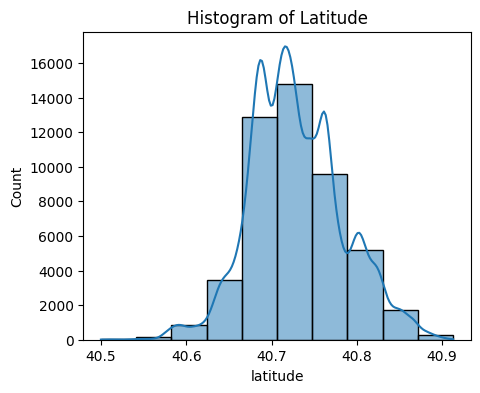

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="latitude", bins=10, kde=True)
plt.title('Histogram of Latitude')

### Histogram showing distribution of longitude

Text(0.5, 1.0, 'Histogram of Longitude')

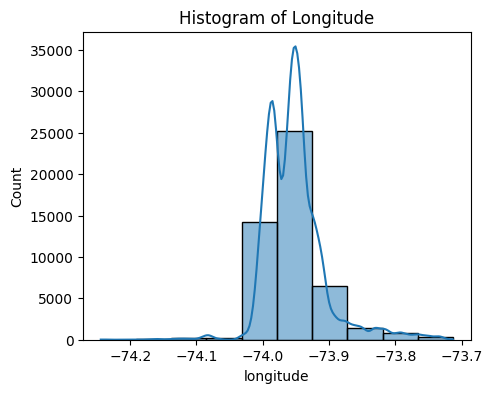

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="longitude", bins=10, kde=True)
plt.title('Histogram of Longitude')

### Histogram showing distribution of price

Text(0.5, 1.0, 'Histogram of Price')

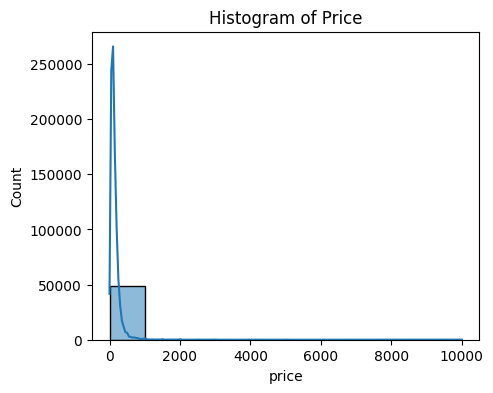

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="price", bins=10, kde=True)
plt.title('Histogram of Price')

In [ ]:
# comments: not clearly visualized , so i'll set max price to 1000 and 100

### Histogram showing distribution of price <= 1000

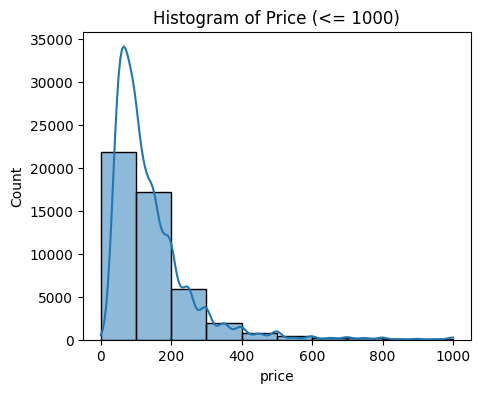

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df[df['price'] <= 1000], x="price", bins=10, kde=True)
plt.title('Histogram of Price (<= 1000)')
plt.show()

### Histogram showing distribution of price <= 100

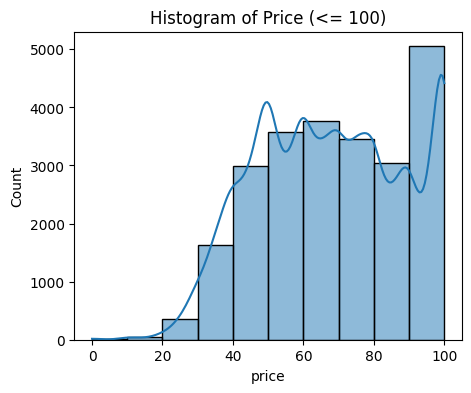

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df[df['price'] <= 100], x="price", bins=10, kde=True)
plt.title('Histogram of Price (<= 100)')
plt.show()

### Histogram showing distribution of mininum nights

Text(0.5, 1.0, 'Histogram of Minimum Nights')

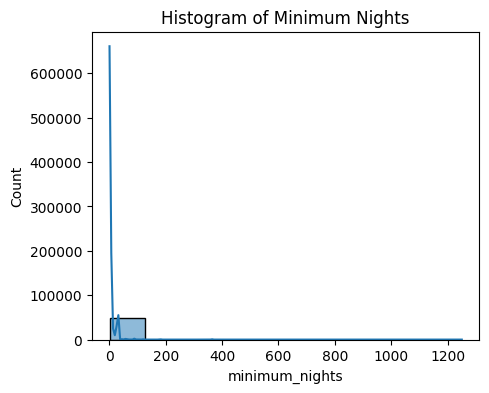

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="minimum_nights", bins=10, kde=True)
plt.title('Histogram of Minimum Nights')

In [ ]:
# comments: not clearly visualized , so i'll set max min_nights to 21

### Histogram showing distribution of mininum nights <= 21

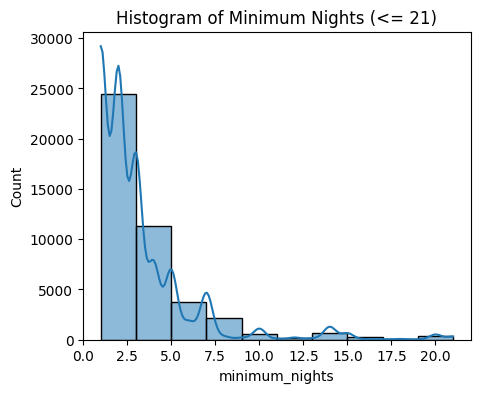

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df[df['minimum_nights'] <= 21], x="minimum_nights", bins=10, kde=True)
plt.title('Histogram of Minimum Nights (<= 21)')
plt.show()

In [ ]:
### Histogram showing distribution of number of reviews

Text(0.5, 1.0, 'Histogram of Number of Reviews')

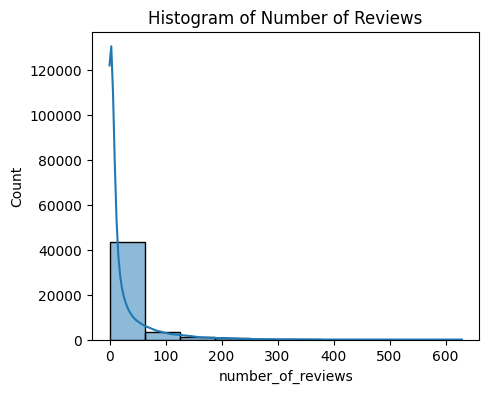

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="number_of_reviews", bins=10, kde=True)
plt.title('Histogram of Number of Reviews')

In [ ]:
# comments: not clearly visualized , so i'll set max reviews to 150

### Histogram showing distribution of number of reviews <= 150

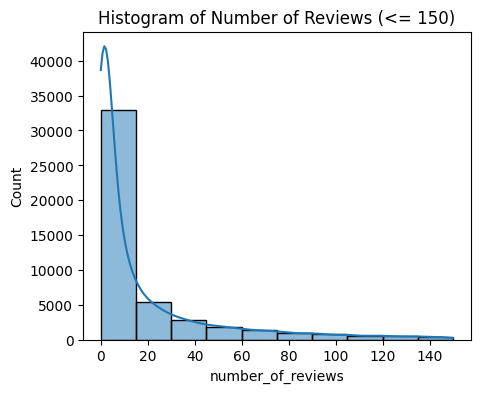

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df[df['number_of_reviews'] <= 150], x="number_of_reviews", bins=10, kde=True)
plt.title('Histogram of Number of Reviews (<= 150)')
plt.show()

### Histogram showing distribution of calculated host listing count

Text(0.5, 1.0, 'Histogram of Calculated Host Listing Count')

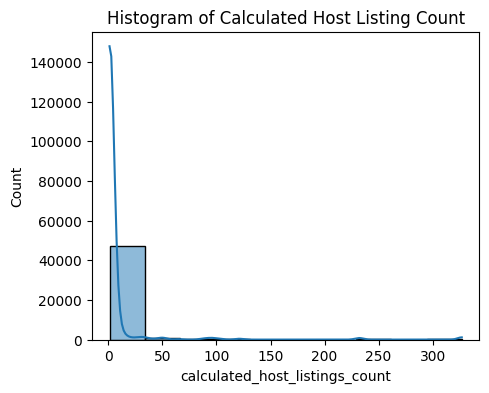

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x="calculated_host_listings_count", bins=10, kde=True)
plt.title('Histogram of Calculated Host Listing Count')

In [ ]:
# comments: not clearly visualized , so i'll set max count to 10

### Histogram showing distribution of calculated host listing count <= 10

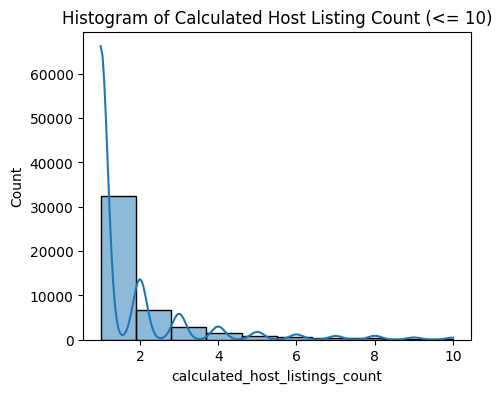

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df[df['calculated_host_listings_count'] <= 10], x="calculated_host_listings_count", bins=10, kde=True)
plt.title('Histogram of Calculated Host Listing Count (<= 10)')
plt.show()

### Frequency distribution table for room type
sorted from highest % to lowest %

In [ ]:
freq_table1 = pd.crosstab(df['room_type'], 'total')
freq_table1["%"] = freq_table1/len(df)

freq_table_sorted1 = freq_table1.sort_values(by='total', ascending=False)

freq_table_sorted1

col_0            total         %
room_type                       
Entire home/apt  25409  0.519665
Private room     22326  0.456611
Shared room       1160  0.023724

### Frequency distribution table for neighbourhood group
sorted from highest % to lowest %

In [ ]:
freq_table2 = pd.crosstab(df['neighbourhood_group'], 'total')
freq_table2["%"] = freq_table2/len(df)

freq_table_sorted2 = freq_table2.sort_values(by='total', ascending=False)

freq_table_sorted2

col_0                total         %
neighbourhood_group                 
Manhattan            21661  0.443011
Brooklyn             20104  0.411167
Queens                5666  0.115881
Bronx                 1091  0.022313
Staten Island          373  0.007629

### Frequency distribution table for neighbourhood
sorted from highest % to lowest %

In [ ]:
freq_table3 = pd.crosstab(df['neighbourhood'], 'total')
freq_table3["%"] = freq_table3/len(df)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

freq_table_sorted3 = freq_table3.sort_values(by='total', ascending=False)

freq_table_sorted3


col_0                       total         %
neighbourhood                              
Williamsburg                 3920  0.080172
Bedford-Stuyvesant           3714  0.075959
Harlem                       2658  0.054361
Bushwick                     2465  0.050414
Upper West Side              1971  0.040311
Hell's Kitchen               1958  0.040045
East Village                 1853  0.037898
Upper East Side              1798  0.036773
Crown Heights                1564  0.031987
Midtown                      1545  0.031598
East Harlem                  1117  0.022845
Greenpoint                   1115  0.022804
Chelsea                      1113  0.022763
Lower East Side               911  0.018632
Astoria                       900  0.018407
Washington Heights            899  0.018386
West Village                  768  0.015707
Financial District            744  0.015216
Flatbush                      621  0.012701
Clinton Hill                  572  0.011699
Long Island City              537  0.010983
Prospect-Lefferts Gardens     535  0.010942
Park Slope                    506  0.010349
East Flatbush                 500  0.010226
Fort Greene                   489  0.010001
Murray Hill                   485  0.009919
Kips Bay                      470  0.009612
Flushing                      426  0.008713
Ridgewood                     423  0.008651
Greenwich Village             392  0.008017
Sunset Park                   390  0.007976
Chinatown                     368  0.007526
Sunnyside                     363  0.007424
SoHo                          358  0.007322
Prospect Heights              357  0.007301
Morningside Heights           346  0.007076
Gramercy                      338  0.006913
Ditmars Steinway              309  0.006320
Theater District              288  0.005890
South Slope                   284  0.005808
Nolita                        253  0.005174
Inwood                        252  0.005154
Gowanus                       247  0.005052
Elmhurst                      237  0.004847
Woodside                      235  0.004806
Carroll Gardens               233  0.004765
Jamaica                       231  0.004724
East New York                 218  0.004459
Jackson Heights               186  0.003804
East Elmhurst                 185  0.003784
Boerum Hill                   177  0.003620
Tribeca                       177  0.003620
Kensington                    175  0.003579
Sheepshead Bay                164  0.003354
Windsor Terrace               157  0.003211
Brooklyn Heights              154  0.003150
Canarsie                      147  0.003006
Forest Hills                  144  0.002945
Bay Ridge                     141  0.002884
Borough Park                  136  0.002781
Cypress Hills                 135  0.002761
Little Italy                  121  0.002475
Maspeth                       110  0.002250
Midwood                       109  0.002229
Rego Park                     106  0.002168
Cobble Hill                    99  0.002025
Richmond Hill                  94  0.001922
Woodhaven                      88  0.001800
Springfield Gardens            85  0.001738
Downtown Brooklyn              83  0.001698
Flatlands                      83  0.001698
Flatiron District              80  0.001636
Red Hook                       79  0.001616
NoHo                           78  0.001595
Arverne                        77  0.001575
Roosevelt Island               77  0.001575
St. Albans                     76  0.001554
Brighton Beach                 75  0.001534
Bensonhurst                    75  0.001534
Two Bridges                    72  0.001473
Kingsbridge                    70  0.001432
Battery Park City              70  0.001432
Gravesend                      68  0.001391
Corona                         64  0.001309
Fordham                        63  0.001288
Ozone Park                     62  0.001268
Longwood                       62  0.001268
Brownsville                    61  0.001248
Mott Haven                     60  0.001

All the above frequency tables provide insight on the prospective counts or porportions of each categorical variable( room type, neighbourhood group, neighbourhood)
higher percentages constitutes higher proportions of the listings.

### Barplot for categorical variables(neighbourhood group, neighbourhood, room type)

graph for neighbourhood_group: total = 5


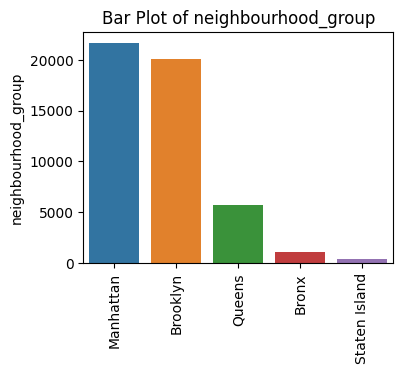

graph for neighbourhood: total = 221


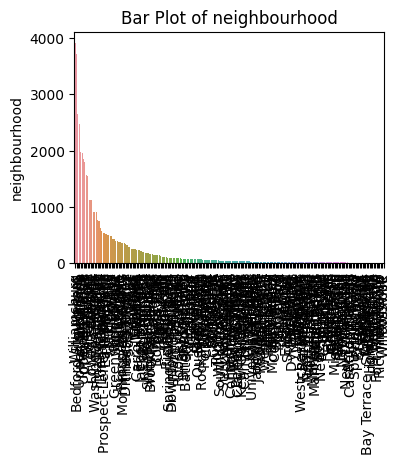

graph for room_type: total = 3


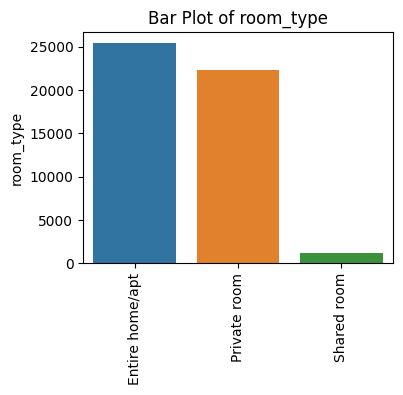

In [ ]:
df_cat = df[['neighbourhood_group', 'neighbourhood',
       'room_type']]

for i in df_cat.columns:
    plt.figure(figsize=(4, 3))
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.title(f"Bar Plot of {i}")
    plt.show()

All the above barplots shows the counts of the sub-group of each categorical variable(room type, neighbourhood group, neighbourhood)

I noticed that for the neighbourhood group, there are more listings in Queens than in Bronx.
Also, for room type, private rooms have more listings as compared to that of shared rooms

### Barplot analysing top 30 neighbourhoods by listing counts

graph for neighbourhood: total = 30


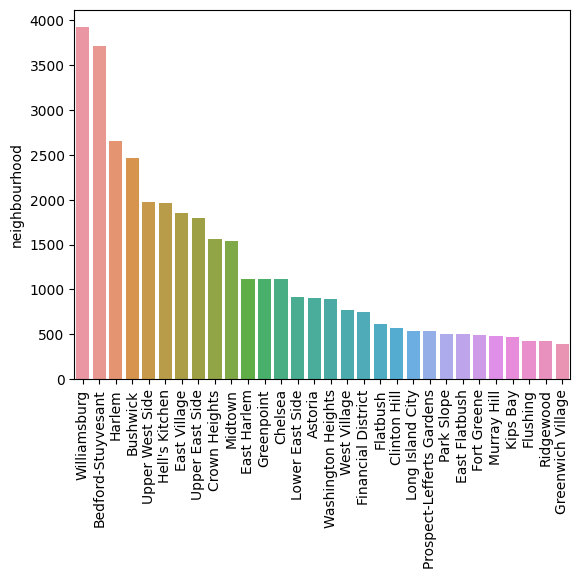

In [ ]:
df_cat_2 = df[['neighbourhood']]

for i in df_cat_2[['neighbourhood']].columns:
    cat_num = df_cat[i].value_counts()[:30]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

The above barplot shows the counts of listings in various neighbourhoods.

I noticed that East Village has more listings as compared to Midtown

### correlation matrix exploring relationship between numeric variables

In [ ]:
 df[['price','minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                calculated_host_listings_count  \
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

Text(0.5, 1.0, 'Heatmap for the correlation matrix')

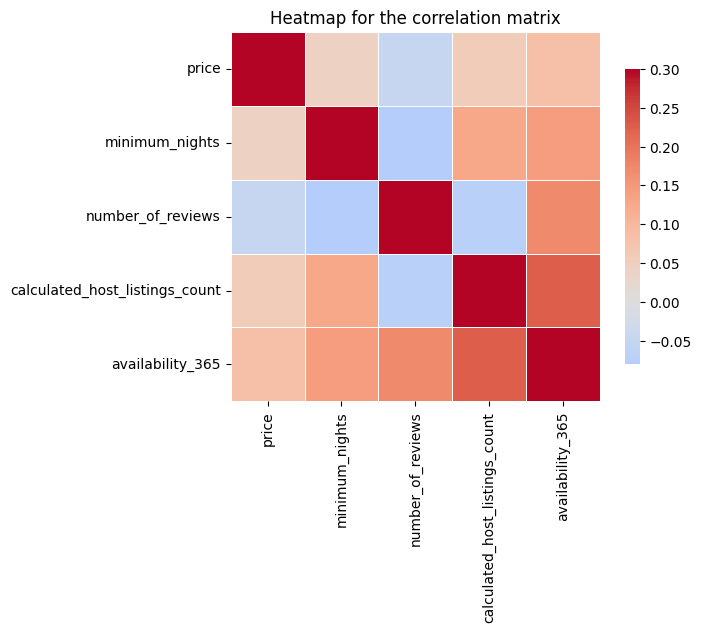

In [ ]:
sns.heatmap(df[['price','minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr(),vmax=.3, center=0, cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Heatmap for the correlation matrix')

I analysed numeric variables using correlation and displayed visually using a heatmap.

I noticed that availability of the listing is positively correlated with all other numeric variables which may make it a key feature for the machine learning models i will build

### Creating price categories

In [ ]:
# creating new dataframe consisting of price categories to easily show the count plot
price_bins = [-1, 100, 500, 1000, 5000, 10000]
price_labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000']

# Create a new categorical column 'price_category'
dff = pd.cut(df['price'], bins=price_bins, labels=price_labels)

### Countplot for room type by price category

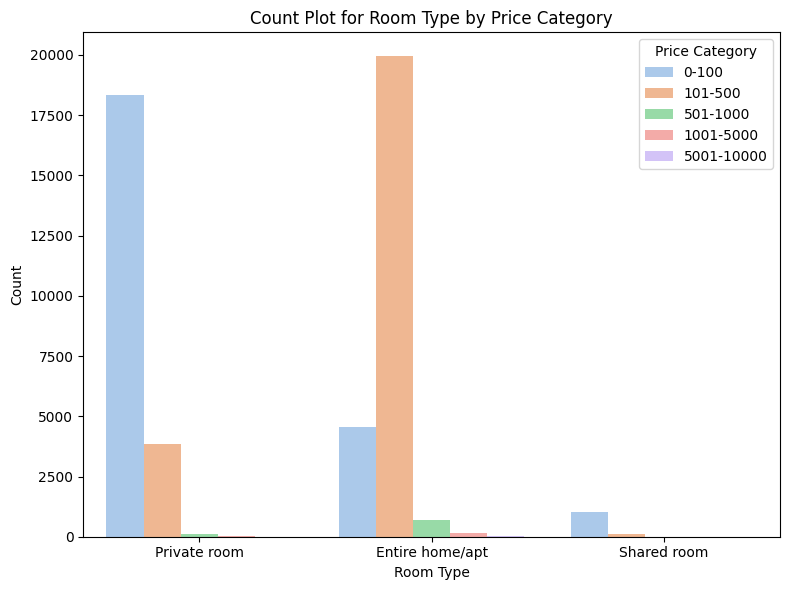

In [ ]:
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
sns.countplot(x="room_type", data=df, hue=dff)

plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Count Plot for Room Type by Price Category")
plt.legend(title="Price Category")

plt.tight_layout()
plt.show()

The above diagram shows the different price ranges in a categorical sub-group

In this case, private room has more listings priced with the range 0-100 whereas Entire home/apt has more listings priced around 101 - 500

### Countplot for neighbourhood group by price category

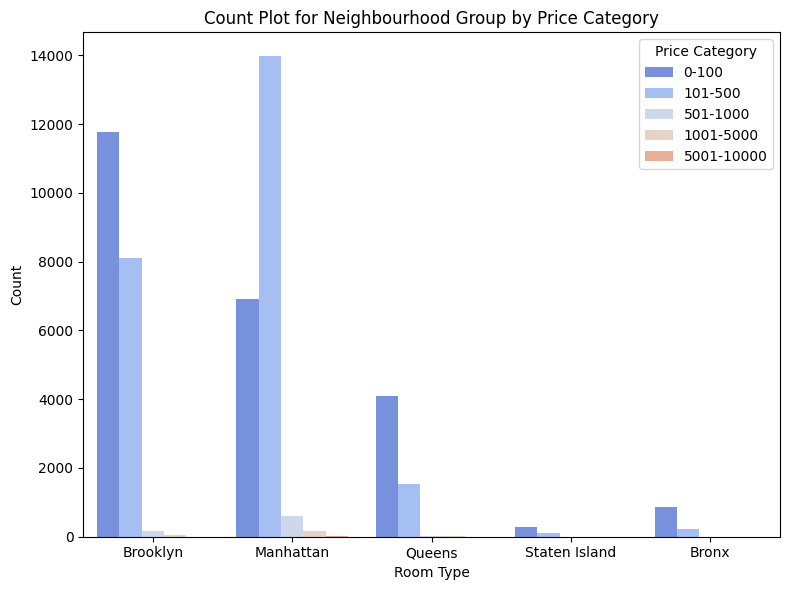

In [ ]:
sns.set_palette("coolwarm")

plt.figure(figsize=(8, 6))
sns.countplot(x="neighbourhood_group", data=df, hue=dff)

plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Count Plot for Neighbourhood Group by Price Category")
plt.legend(title="Price Category")

plt.tight_layout()
plt.show()

In this group, Brooklyn has more listings priced with the range 0-100 whereas Manhattan has more listings priced around 101 - 500

### Countplot for top 20 neighbourhoods by price category

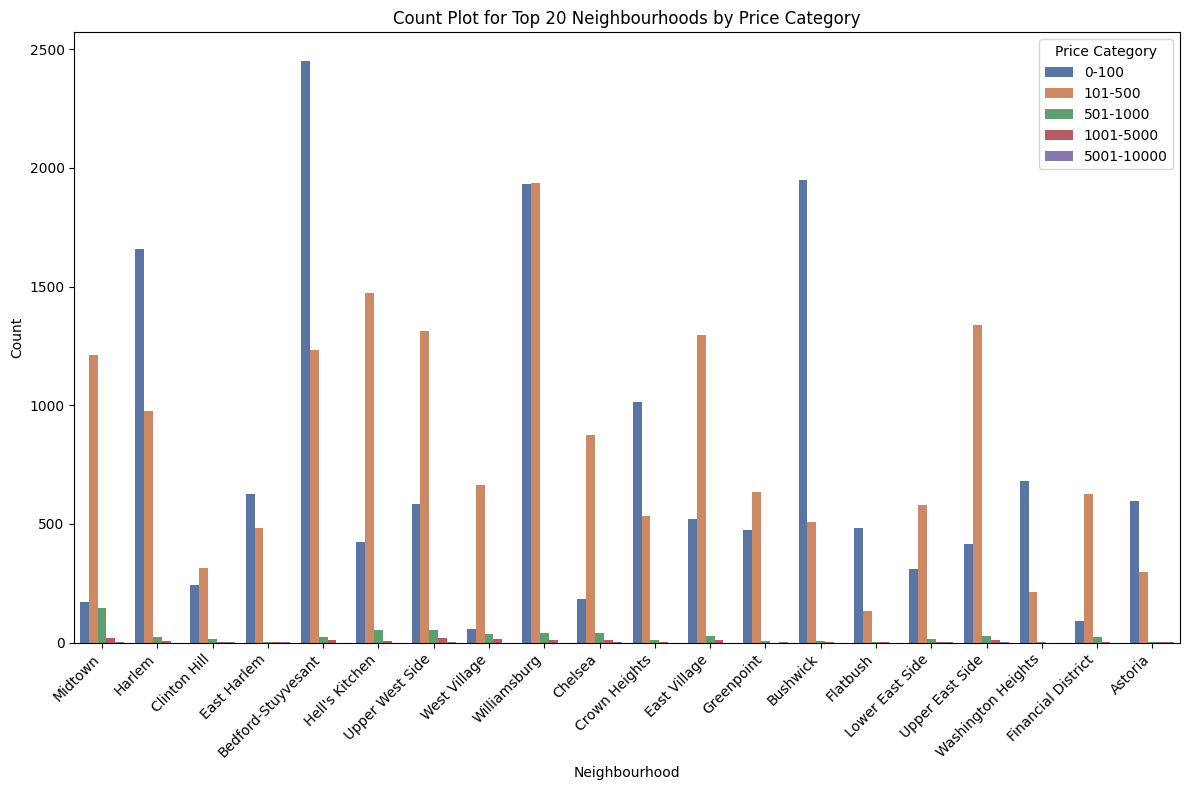

In [ ]:
neighbourhood_counts = df['neighbourhood'].value_counts()

top_neighbourhoods = neighbourhood_counts.head(20).index

# filter dataframe to include only the top 20
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

sns.set_palette("deep")

plt.figure(figsize=(12, 8))
sns.countplot(x="neighbourhood", data=df_top_neighbourhoods, hue=dff)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("Count Plot for Top 20 Neighbourhoods by Price Category")
plt.legend(title="Price Category")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In this group, Harlem has more listings priced with the range 0-100 whereas Midtown has more listings priced around 101 - 500

### Pie chart for room types

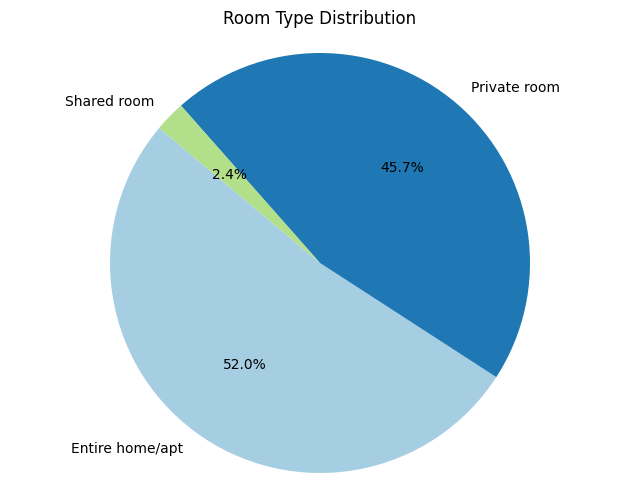

In [ ]:
room_types = freq_table_sorted1.index
percentages = freq_table_sorted1['%']

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=room_types, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')

plt.title('Room Type Distribution')

plt.show()


From the diagram, 52% of the listings are Entire home/apt, 45.7% are private room listings and 2.4% are listings for shared room

### Pie chart for neighbourhood group

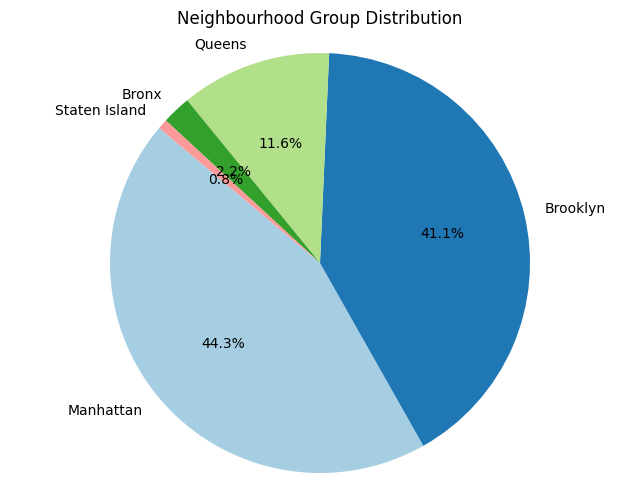

In [ ]:
neighbourhood_groups = freq_table_sorted2.index
percentages = freq_table_sorted2['%']

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=neighbourhood_groups, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')

plt.title('Neighbourhood Group Distribution')

plt.show()


From the diagram, the most listings are from Manhattan(44.3%) and the least from Staten Island(0.8%)

### Pie chart showing the top 20 listings by neighbourhood

col_0               total         %
neighbourhood                      
Williamsburg         3920  0.080172
Bedford-Stuyvesant   3714  0.075959
Harlem               2658  0.054361
Bushwick             2465  0.050414
Upper West Side      1971  0.040311
Hell's Kitchen       1958  0.040045
East Village         1853  0.037898
Upper East Side      1798  0.036773
Crown Heights        1564  0.031987
Midtown              1545  0.031598
East Harlem          1117  0.022845
Greenpoint           1115  0.022804
Chelsea              1113  0.022763
Lower East Side       911  0.018632
Astoria               900  0.018407
Washington Heights    899  0.018386
West Village          768  0.015707
Financial District    744  0.015216
Flatbush              621  0.012701
Clinton Hill          572  0.011699


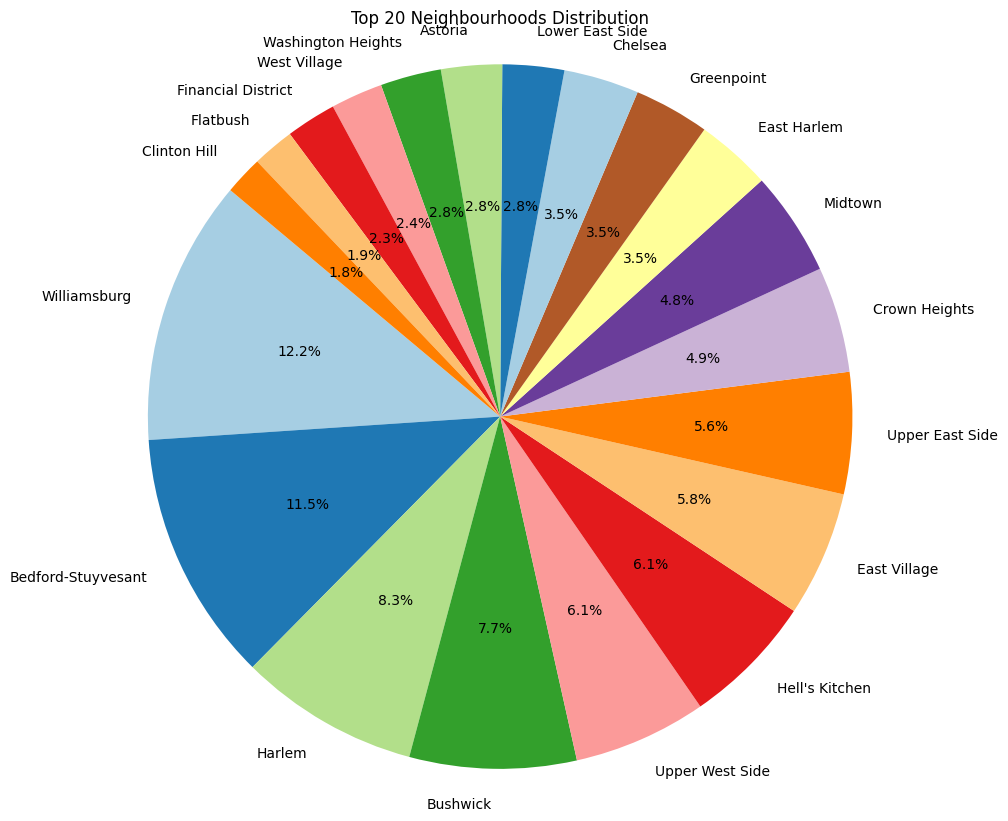

In [ ]:
neighbourhoods = freq_table_sorted3.index[:20]
percentages = freq_table_sorted3['%'][:20]

print(freq_table_sorted3.head(20))

plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=neighbourhoods, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')

plt.title('Top 20 Neighbourhoods Distribution')

plt.show()


From the diagram, the neighbouhood with the most listings is Williamsburg(12.2%) and the least from Clinton Hill(1.8%)

### Pivot table for 1 column

comparing the average prices of neighbourhood_group, neighbourhood, room_type

In [ ]:
df_pivots = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]

# create pivot tables iteratively for 1 column
for i in df_pivots.columns:
    if i != 'price':  # Skip creating pivot table for 'price' column
        print(f"--- Pivot Table for {i} ---")
        pivot_table1 = pd.pivot_table(df_pivots, index=i, values='price').sort_values('price', ascending=True)
        print(pivot_table1)
        print("\n")


--- Pivot Table for neighbourhood_group ---
                          price
neighbourhood_group            
Bronx                 87.496792
Queens                99.517649
Staten Island        114.812332
Brooklyn             124.383207
Manhattan            196.875814


--- Pivot Table for neighbourhood ---
                                 price
neighbourhood                         
Bull's Head                  47.333333
Hunts Point                  50.500000
Tremont                      51.545455
Soundview                    53.466667
New Dorp                     57.000000
Bronxdale                    57.105263
New Dorp Beach               57.400000
Grant City                   57.666667
Concord                      58.192308
Mount Eden                   58.500000
Corona                       59.171875
Woodlawn                     60.090909
Castle Hill                  63.000000
Borough Park                 63.066176
Olinville                    64.000000
Woodhaven                    

### Pivot table for 2 columns

comparing the average prices of neighbourhood_group, neighbourhood, room_type

In [ ]:
# categorical variables in a dataframe
p_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]

# columns for which pivot tables will be created
pivot_columns = ['neighbourhood', 'neighbourhood_group', 'room_type']

# create pivot tables iteratively for 2 columns
for i in range(len(pivot_columns)):
    for j in range(i + 1, len(pivot_columns)):
        col1 = pivot_columns[i]
        col2 = pivot_columns[j]

        print(f"--- Pivot Table for {col1} and {col2} ---")
        pivot_table2 = pd.pivot_table(p_cat, index=col1, columns=col2, values='price')
        print(pivot_table2)
        print("\n")

--- Pivot Table for neighbourhood and neighbourhood_group ---
neighbourhood_group              Bronx    Brooklyn   Manhattan      Queens  \
neighbourhood                                                                
Allerton                     87.595238         NaN         NaN         NaN   
Arden Heights                      NaN         NaN         NaN         NaN   
Arrochar                           NaN         NaN         NaN         NaN   
Arverne                            NaN         NaN         NaN  171.779221   
Astoria                            NaN         NaN         NaN  117.187778   
Bath Beach                         NaN   81.764706         NaN         NaN   
Battery Park City                  NaN         NaN  367.557143         NaN   
Bay Ridge                          NaN  144.432624         NaN         NaN   
Bay Terrace                        NaN         NaN         NaN  142.000000   
Bay Terrace, Staten Island         NaN         NaN         NaN         NaN   
Ba

### Pivot table for 3 column

comparing the average prices of neighbourhood_group, neighbourhood, room_type

In [ ]:
# columns for which pivot tables will be created
pivot_col = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Create pivot tables iteratively for 3 columns
for i in range(len(pivot_col)):
    for j in range(i + 1, len(pivot_col)):
        for k in range(j + 1, len(pivot_col)):
            col1 = pivot_col[i]
            col2 = pivot_col[j]
            col3 = pivot_col[k]

            print(f"--- Pivot Table for {col1}, {col2}, and {col3} ---")
            pivot_table3 = pd.pivot_table(df, index=[col1, col2], columns=col3, values='price')
            print(pivot_table3)
            print("\n")

--- Pivot Table for neighbourhood_group, neighbourhood, and room_type ---
room_type                                       Entire home/apt  Private room  \
neighbourhood_group neighbourhood                                               
Bronx               Allerton                         123.062500     65.769231   
                    Baychester                        90.333333     64.250000   
                    Belmont                          228.666667     52.947368   
                    Bronxdale                         77.500000     40.800000   
                    Castle Hill                       93.500000     38.600000   
                    City Island                      235.272727     75.142857   
                    Claremont Village                130.500000     70.250000   
                    Clason Point                     171.750000     82.636364   
                    Co-op City                              NaN     77.500000   
                    Concourse      

All pivot tables above show the average prices of various sub-groups of the categorical variables.

All values with "NaN" means the combination of sub-groups of the categorical variables does not exist
example; the neighbourhood Allerton has no listing for Shared room thus will be represent by "NaN"

a visual representation will be shown below with heatmaps

### Showing correlation heatmap for pivot table with 3 columns

--- Pivot Table for neighbourhood_group, neighbourhood, and room_type ---


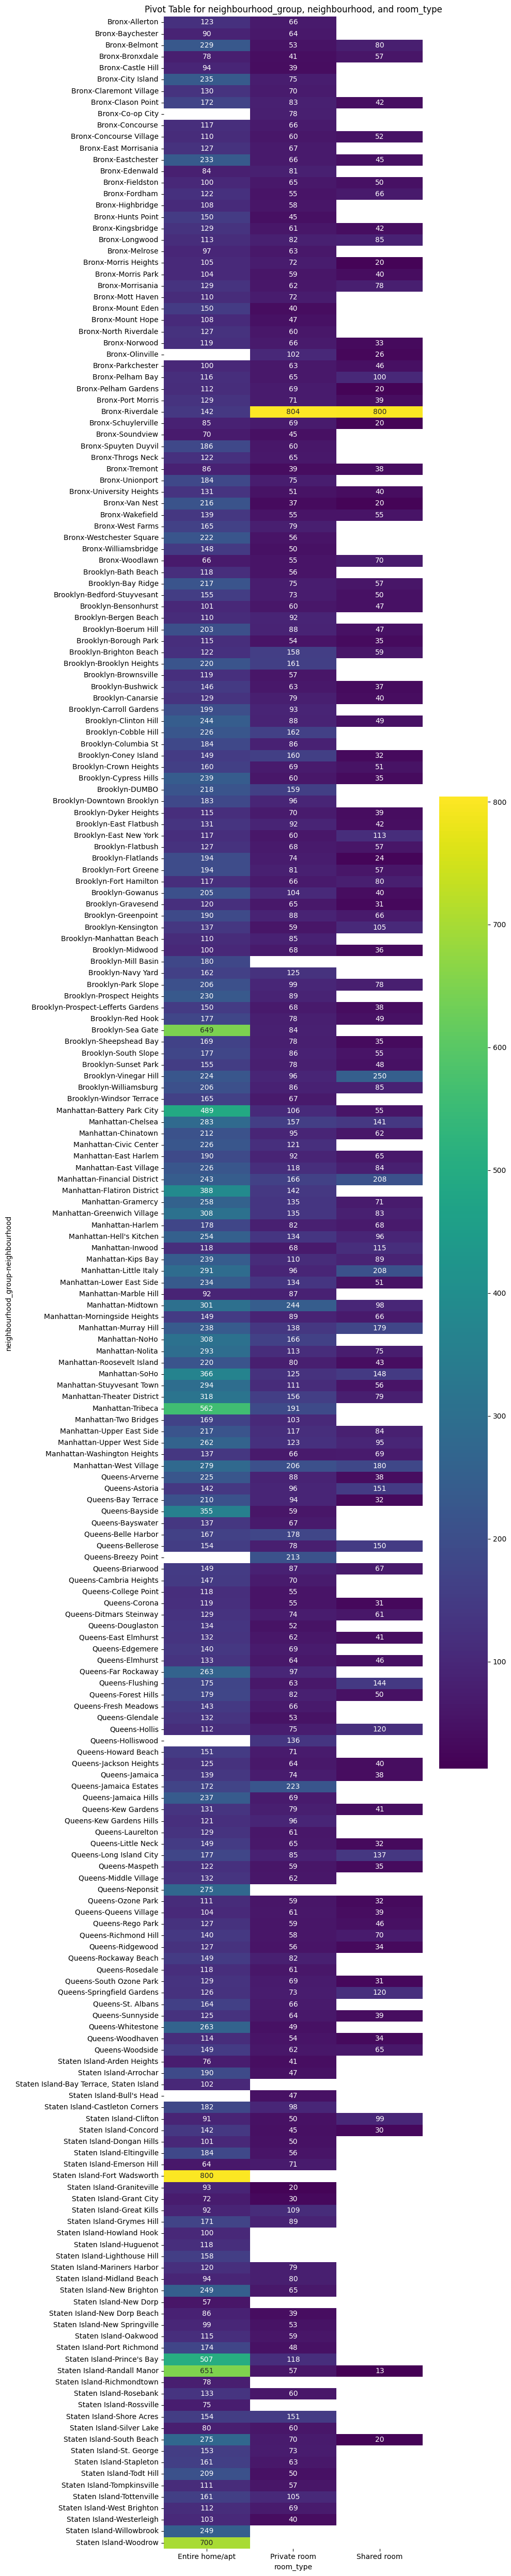

In [ ]:
# Columns for which pivot tables will be created
pivot_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Create pivot tables iteratively for 3 columns
for i in range(len(pivot_columns)):
    for j in range(i + 1, len(pivot_columns)):
        for k in range(j + 1, len(pivot_columns)):
            col1 = pivot_columns[i]
            col2 = pivot_columns[j]
            col3 = pivot_columns[k]

            print(f"--- Pivot Table for {col1}, {col2}, and {col3} ---")
            pivot_table = pd.pivot_table(df, index=[col1, col2], columns=col3, values='price')
            #print(pivot_table)

            # Round prices to the nearest whole number
            pivot_table = pivot_table.applymap(lambda x: np.round(x) if not np.isnan(x) else x)

            # annotations function
            def custom_format(x):
                if np.isnan(x):
                    return ''
                return f"{int(x):,}"


            plt.figure(figsize=(10, 50))
            sns.heatmap(pivot_table, annot=pivot_table.applymap(custom_format), fmt='', cmap='viridis')
            plt.title(f"Pivot Table for {col1}, {col2}, and {col3}")
            plt.tight_layout()
            plt.show()




### Showing correlation heatmap for pivot table with 2 columns

--- Pivot Table for neighbourhood and neighbourhood_group ---


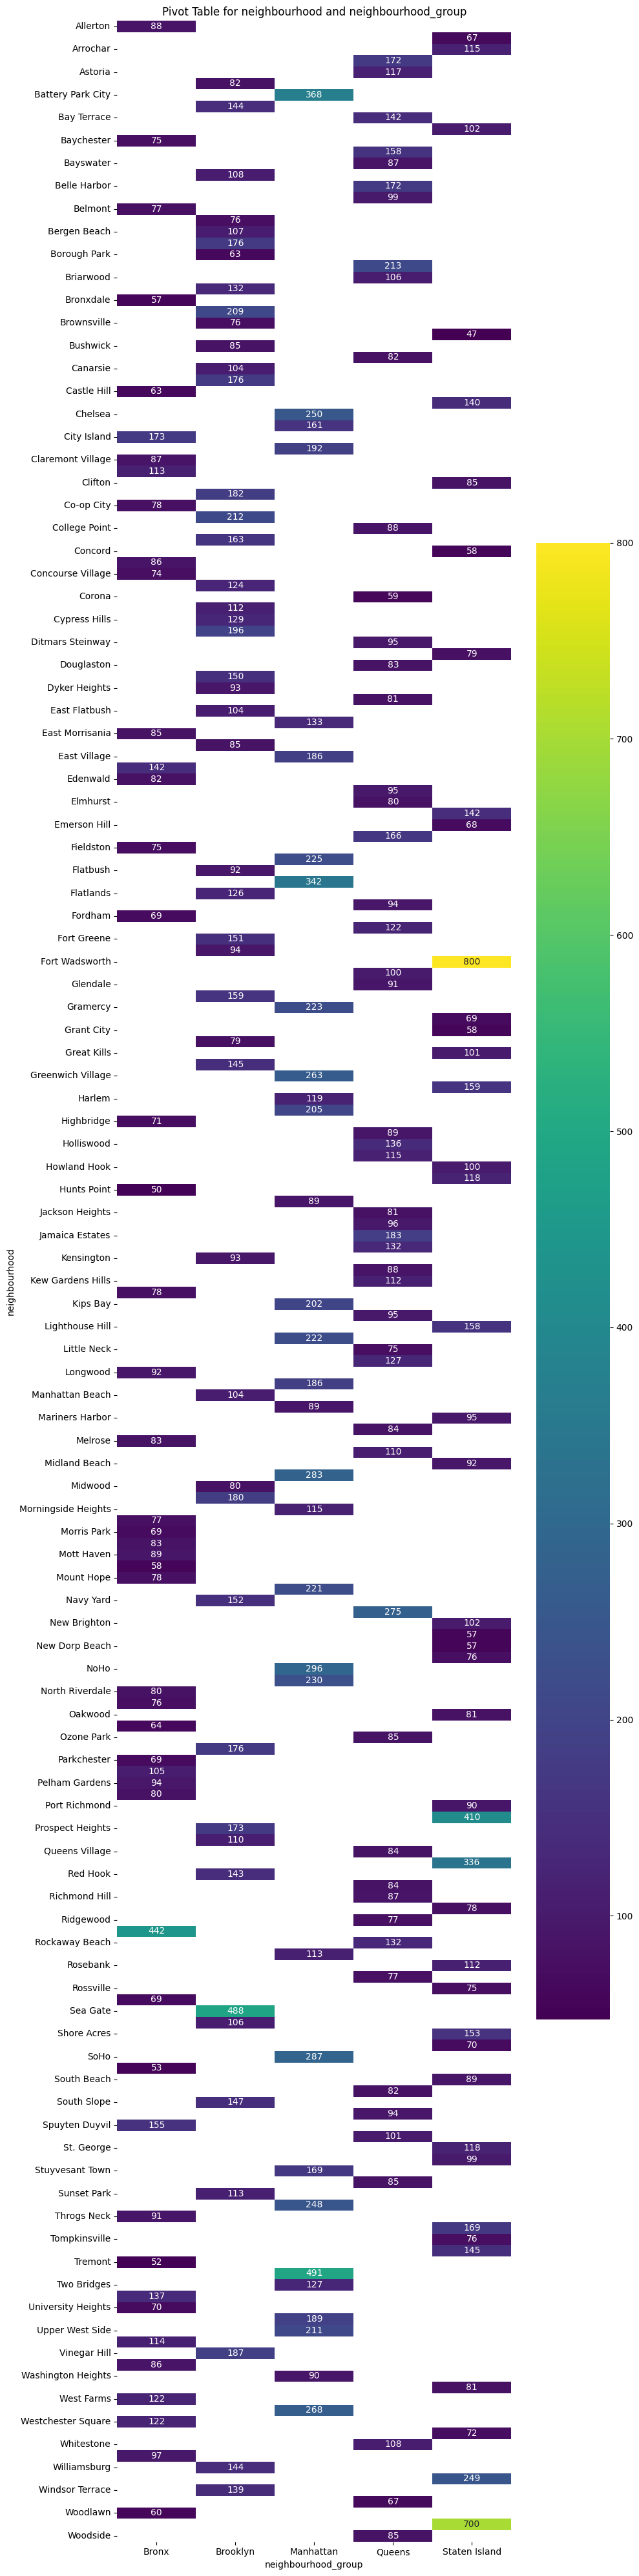

--- Pivot Table for neighbourhood and room_type ---


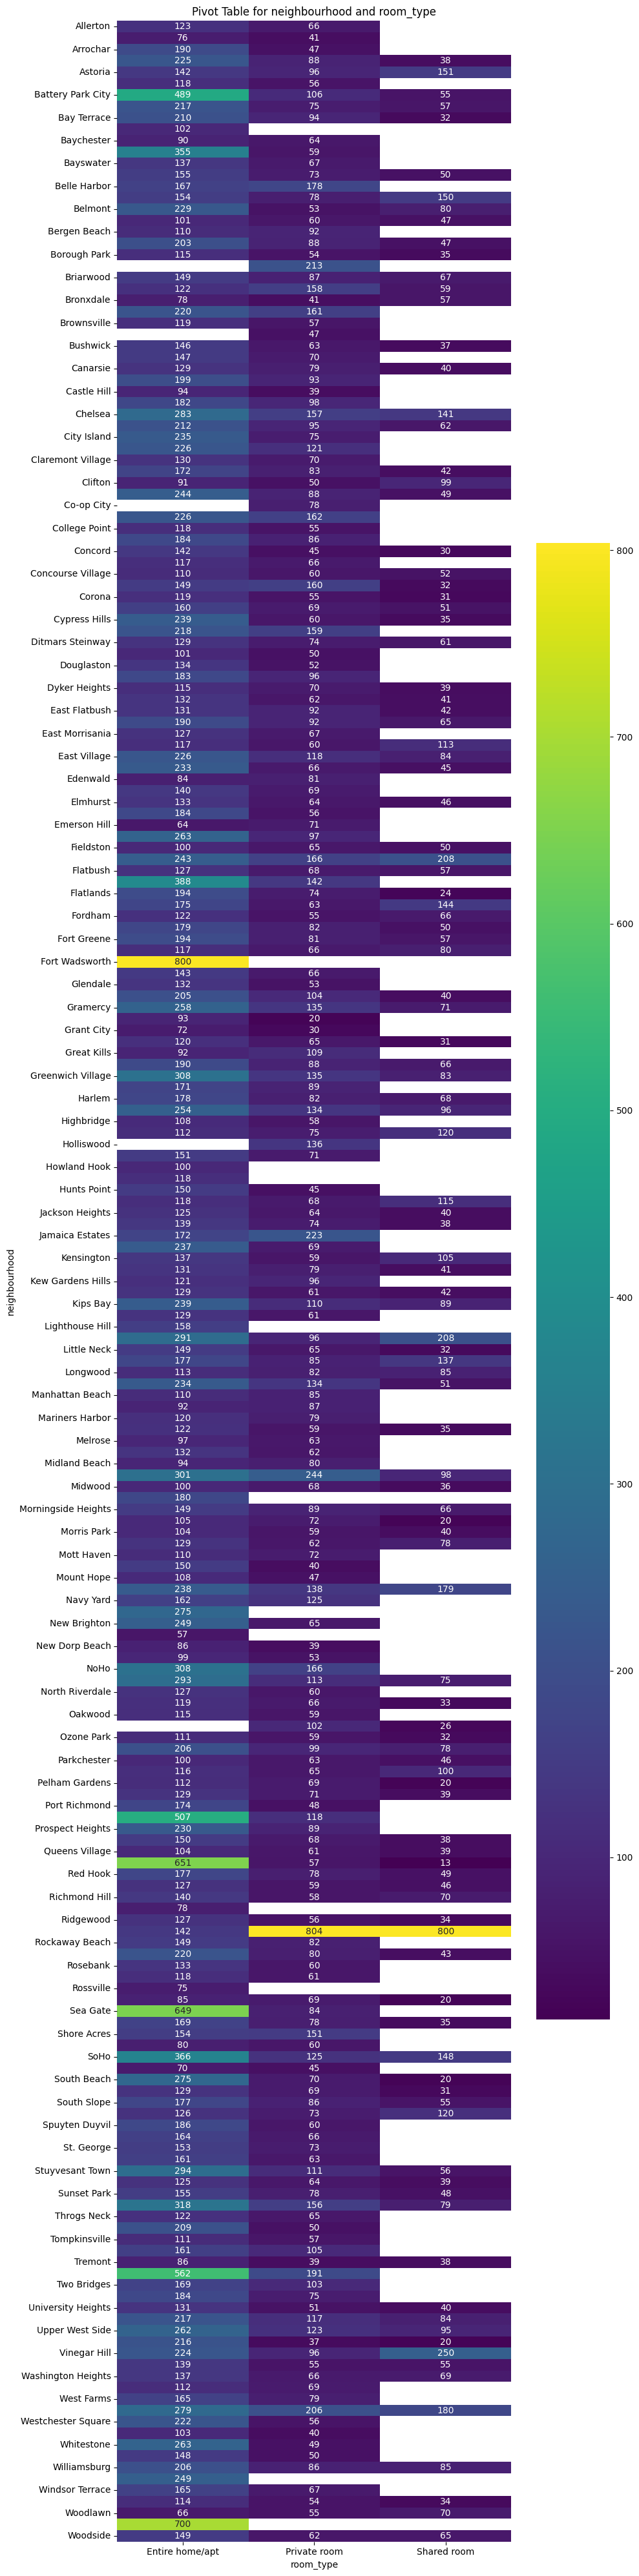

--- Pivot Table for neighbourhood_group and room_type ---


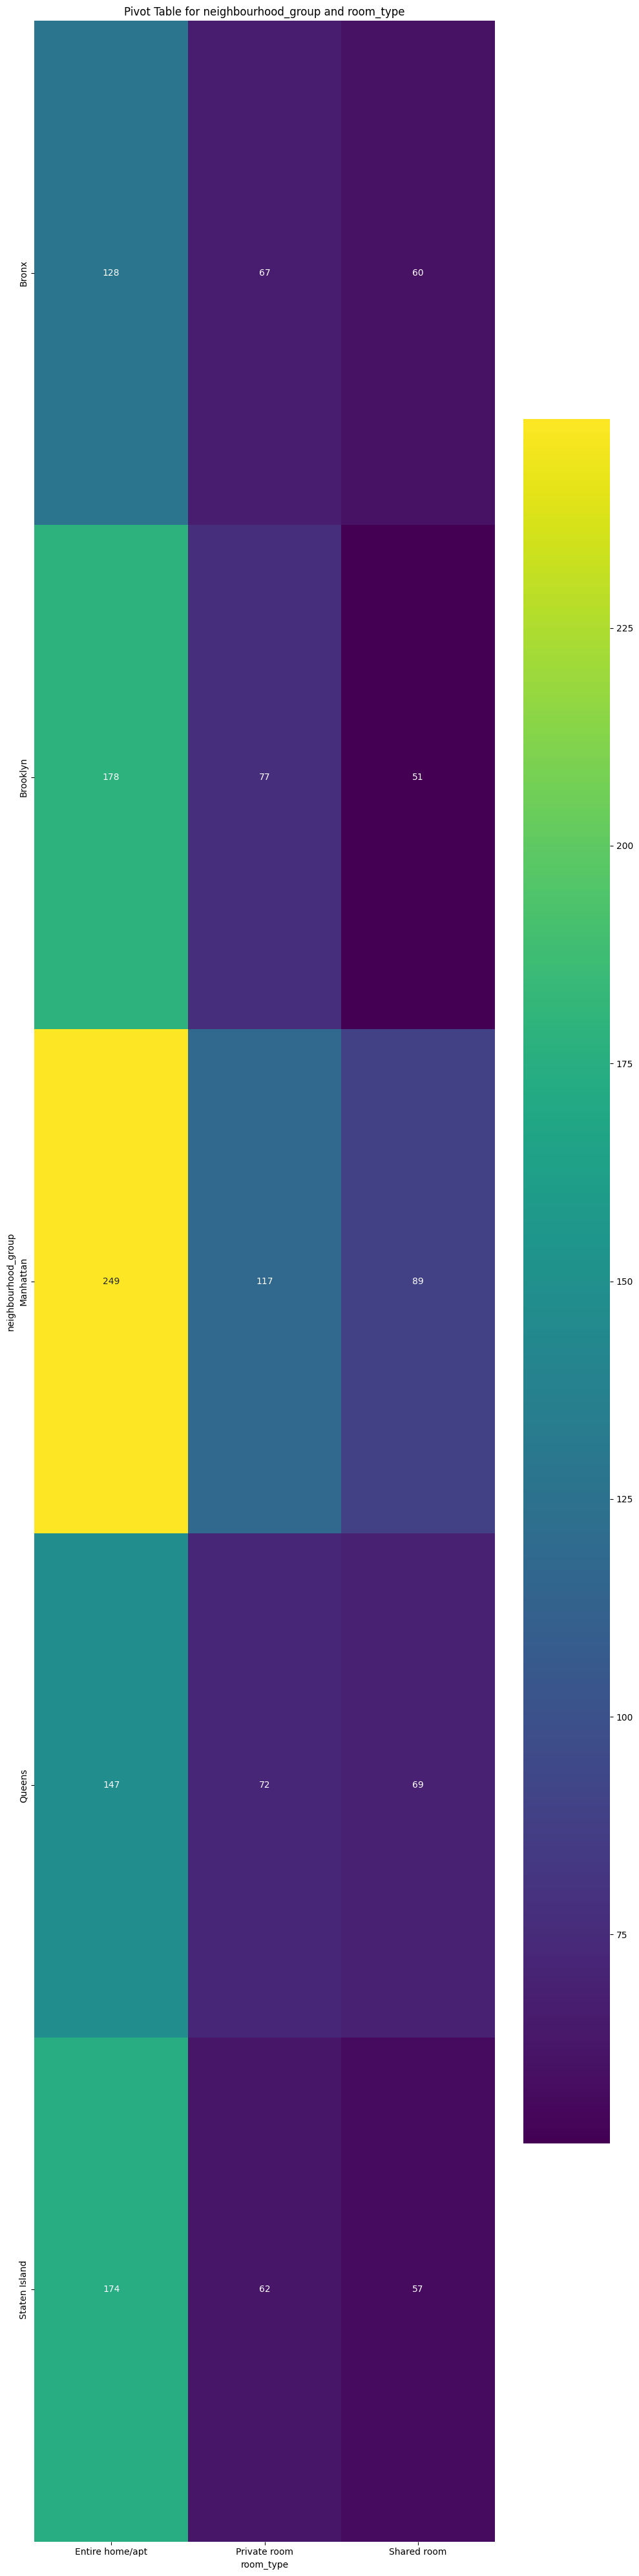

In [ ]:
# Columns for which pivot tables will be created
pivot_columns = ['neighbourhood', 'neighbourhood_group', 'room_type']

# Create pivot tables iteratively for 2 columns
for i in range(len(pivot_columns)):
    for j in range(i + 1, len(pivot_columns)):
        col1 = pivot_columns[i]
        col2 = pivot_columns[j]

        print(f"--- Pivot Table for {col1} and {col2} ---")
        pivot_table = pd.pivot_table(p_cat, index=col1, columns=col2, values='price')
        #print(pivot_table)

        # Round prices to the nearest whole number
        pivot_table = pivot_table.applymap(lambda x: int(np.round(x)) if not np.isnan(x) else x)

        # Create a custom formatting function for annotations
        def custom_format(x):
            if np.isnan(x):
                  return ''
            return f"{x:,.0f}"  # Format to display as integer with commas

        # Create a heatmap
        plt.figure(figsize=(10, 40))
        sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
        plt.title(f"Pivot Table for {col1} and {col2}")
        plt.tight_layout()
        plt.show()

### Barplot showing average price for room types

         Room Type  Counts      %      Average Price
0  Entire home/apt   25409  51.966459     211.794246
1     Private room   22326  45.661111      89.780973
2      Shared room    1160   2.372431      70.127586


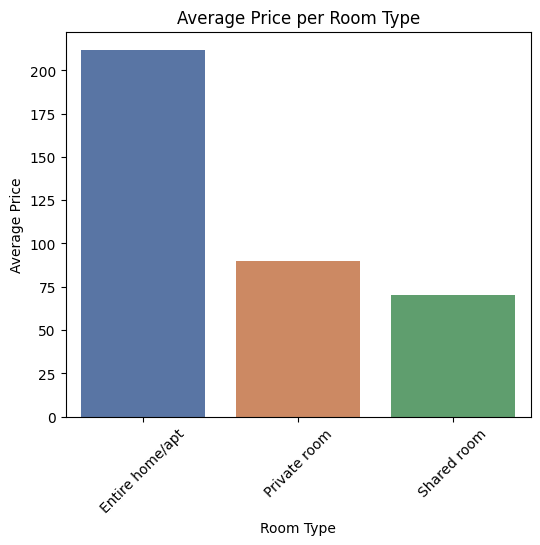

In [ ]:
avg_price_per_type = df.groupby('room_type')['price'].mean()
count_per_type = df['room_type'].value_counts()
total_rooms = len(df)

percentage_per_type = (count_per_type / total_rooms) * 100

frequency_table = pd.DataFrame({
    'Room Type': avg_price_per_type.index,
    'Counts': count_per_type.values,
    '%    ': percentage_per_type.values,
    'Average Price': avg_price_per_type.values
})

plt.figure(figsize=(6, 5))
sns.barplot(x='Room Type', y='Average Price', data=frequency_table)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

print(frequency_table)

plt.show()


Prices for Entire home/apt are averagely higher than private room and shared room

### Barplot showing average price for neighbourhood groups

  neighbourhood Group  Counts      %      Average Price
0               Bronx   21661  44.301053      87.496792
1            Brooklyn   20104  41.116679     124.383207
2           Manhattan    5666  11.588097     196.875814
3              Queens    1091   2.231312      99.517649
4       Staten Island     373   0.762859     114.812332


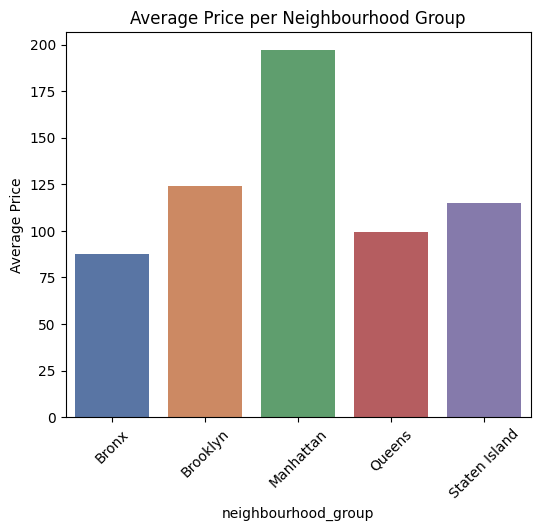

In [ ]:
avg_price_per_type = df.groupby('neighbourhood_group')['price'].mean()
count_per_type = df['neighbourhood_group'].value_counts()
total_neigh_grp = len(df)

percentage_per_type = (count_per_type / total_neigh_grp) * 100

frequency_table = pd.DataFrame({
    'neighbourhood Group': avg_price_per_type.index,
    'Counts': count_per_type.values,
    '%    ': percentage_per_type.values,
    'Average Price': avg_price_per_type.values
})

plt.figure(figsize=(6, 5))
sns.barplot(x='neighbourhood Group', y='Average Price', data=frequency_table)
plt.title('Average Price per Neighbourhood Group')
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

print(frequency_table)

plt.show()

Prices in Manhattan are averagely higher the other neighbourhood groups

### Barplot showing the top 20 neighbourhoods by average price

          Neighbourhood  Counts         %  Average Price
82       Fort Wadsworth      68  0.139074     800.000000
219             Woodrow       1  0.002045     700.000000
197             Tribeca       4  0.008181     490.638418
174            Sea Gate       8  0.016362     487.857143
167           Riverdale      10  0.020452     442.090909
157        Prince's Bay      11  0.022497     409.500000
6     Battery Park City    1853  3.789754     367.557143
75    Flatiron District      77  0.157480     341.925000
161       Randall Manor      11  0.022497     336.000000
144                NoHo      15  0.030678     295.717949
178                SoHo       7  0.014316     287.103352
127             Midtown      21  0.042949     282.719094
139            Neponsit      17  0.034768     274.666667
209        West Village       2  0.004090     267.682292
92    Greenwich Village      56  0.114531     263.405612
34              Chelsea     357  0.730136     249.738544
215         Willowbrook       1

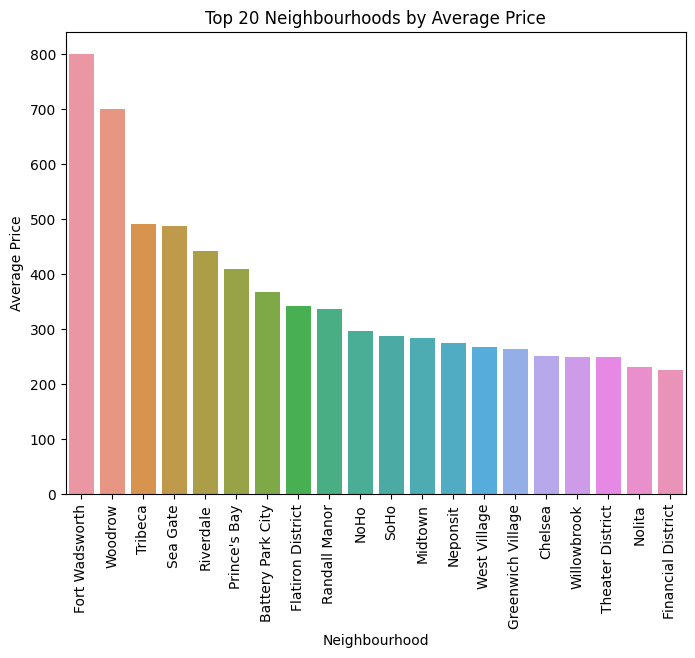

In [ ]:
avg_price_per_type = df.groupby('neighbourhood')['price'].mean()
count_per_type = df['neighbourhood'].value_counts()
total_neigh = len(df)

percentage_per_type = (count_per_type / total_neigh) * 100

frequency_table = pd.DataFrame({
    'Neighbourhood': avg_price_per_type.index,
    'Counts': count_per_type.values,
    '%': percentage_per_type.values,
    'Average Price': avg_price_per_type.values
})

frequency_table = frequency_table.sort_values(by='Average Price', ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x='Neighbourhood', y='Average Price', data=frequency_table)
plt.title('Top 20 Neighbourhoods by Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

print(frequency_table)

plt.show()


### Barplot showing the bottom 20 neighbourhoods by average price

      Neighbourhood  Counts         %  Average Price
152     Parkchester      13  0.026588      69.076923
87     Graniteville      61  0.124757      68.666667
70     Emerson Hill      83  0.169752      68.200000
1     Arden Heights    3714  7.595869      67.250000
217       Woodhaven       1  0.002045      67.170455
149       Olinville      14  0.028633      64.000000
20     Borough Park     537  1.098272      63.066176
32      Castle Hill     363  0.742407      63.000000
218        Woodlawn       1  0.002045      60.090909
50           Corona     177  0.362000      59.171875
135      Mount Eden      18  0.036814      58.500000
46          Concord     231  0.472441      58.192308
88       Grant City      60  0.122712      57.666667
142  New Dorp Beach      17  0.034768      57.400000
24        Bronxdale     489  1.000102      57.105263
141        New Dorp      17  0.034768      57.000000
179       Soundview       7  0.014316      53.466667
196         Tremont       4  0.008181      51.

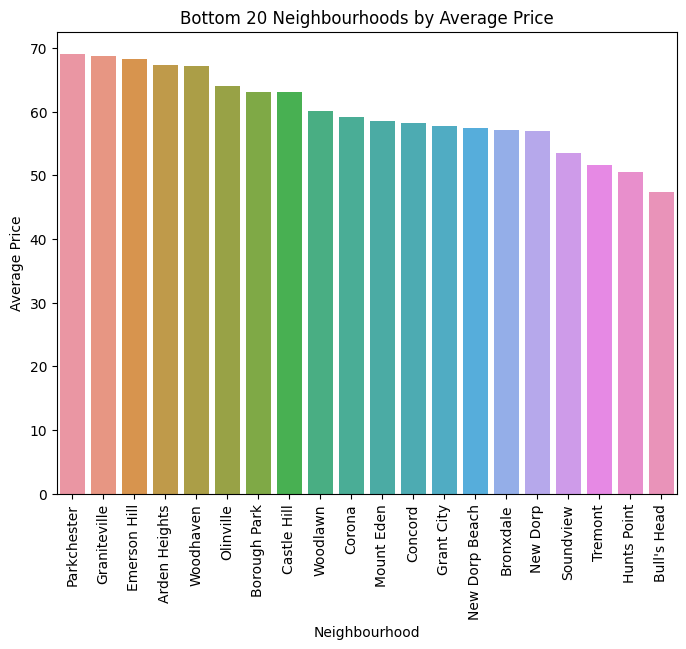

In [ ]:
avg_price_per_type = df.groupby('neighbourhood')['price'].mean()
count_per_type = df['neighbourhood'].value_counts()
total_neigh = len(df)

percentage_per_type = (count_per_type / total_neigh) * 100

frequency_table = pd.DataFrame({
    'Neighbourhood': avg_price_per_type.index,
    'Counts': count_per_type.values,
    '%': percentage_per_type.values,
    'Average Price': avg_price_per_type.values
})

frequency_table = frequency_table.sort_values(by='Average Price', ascending=False).tail(20)

plt.figure(figsize=(8, 6))
sns.barplot(x='Neighbourhood', y='Average Price', data=frequency_table)
plt.title('Bottom 20 Neighbourhoods by Average Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

print(frequency_table)

plt.show()

### Plotting geographic variation in prices

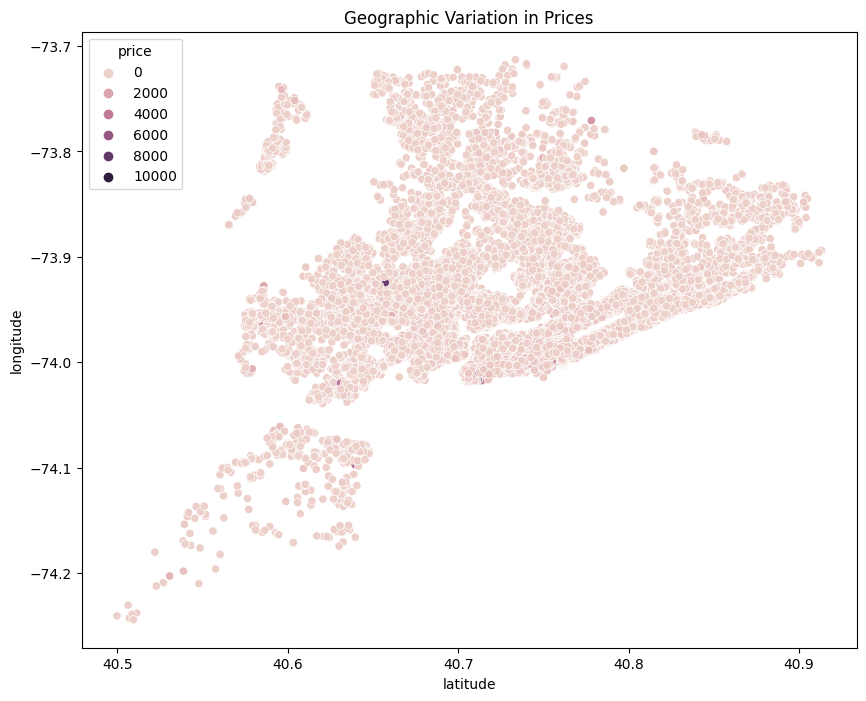

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', hue='price', data=df)
plt.title('Geographic Variation in Prices')
plt.show()

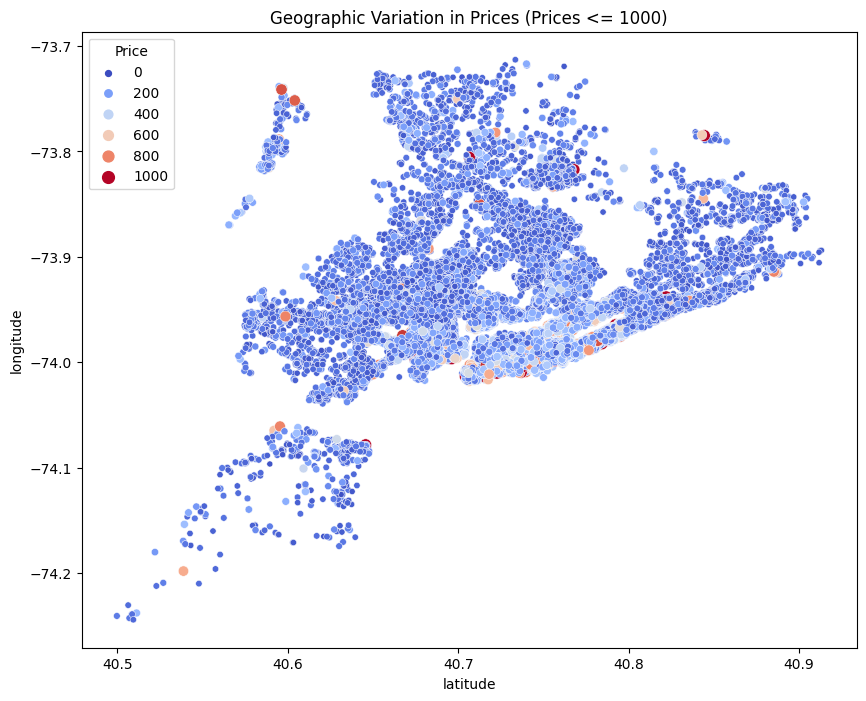

In [ ]:
# filter the data for prices <= 1000
filtered_df = df[df['price'] <= 1000]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', hue='price', data=filtered_df, palette='coolwarm', size='price')
plt.title('Geographic Variation in Prices (Prices <= 1000)')
plt.legend(title='Price')
plt.show()

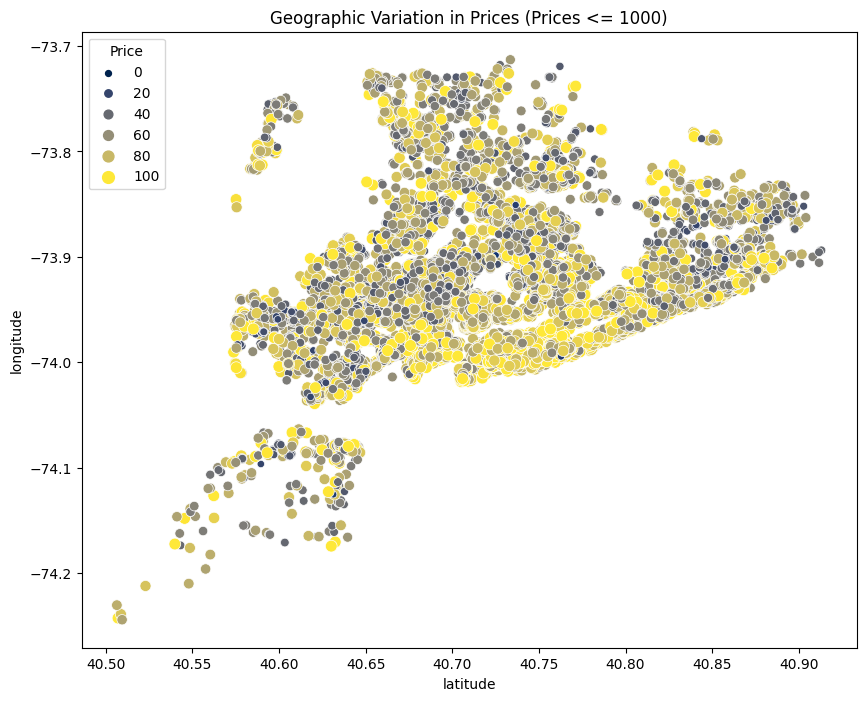

In [ ]:
# filter the data for prices <= 100
filtered_df = df[df['price'] <= 100]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', hue='price', data=filtered_df, palette='cividis', size='price')
plt.title('Geographic Variation in Prices (Prices <= 1000)')
plt.legend(title='Price')
plt.show()

Graphed the differences in price at different geographical regions using the latitude and longitude columns

Filtered the prices(prices<=1000 and prices <=100) to improve on visualizing where prices vary.

### Heatmap analysis

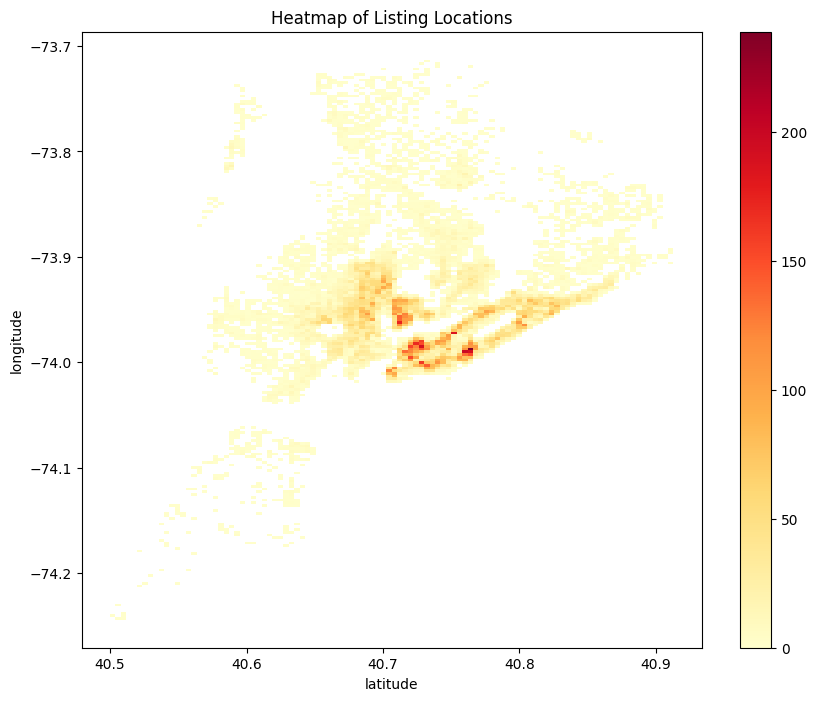

In [ ]:

plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='latitude', y='longitude', cmap='YlOrRd', cbar=True)
plt.title('Heatmap of Listing Locations')
plt.show()

In [ ]:
# option to save cleaned data
# df.to_csv('MH_cleaned')

## MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

### Preprocessing categorical variables

In [ ]:
le = LabelEncoder()
df['room_type_encoded'] = le.fit_transform(df['room_type'])
df['neighbourhood_encoded'] = le.fit_transform(df['neighbourhood'])
df['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])

### Features selection

In [ ]:
features = df[['room_type_encoded', 'neighbourhood_encoded', 'neighbourhood_group_encoded', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price']]

### Assigning independent and dependent variable

In [ ]:
X = features.drop(['price'], axis =1)
y = features.price.values

### Splitting dataset into test(20%) and train(80%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### models

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

# Lasso Regression
ll = Lasso()
ll.fit(X_train, y_train)
ll_predictions = ll.predict(X_test)

## MODEL PERFORMANCE

 Evaluating models with MAE, MSE and RMSE

In [ ]:
def evaluate_model(predictions, model_name):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} MSE: {mse:.2f}")
    print(f"{model_name} RMSE: {rmse:.2f}")

evaluate_model(lr_predictions, "\nLinear Regression")
evaluate_model(rf_predictions, "\nRandom Forest")
evaluate_model(gb_predictions, "\nGradient Boosting")
evaluate_model(ll_predictions, "\nLasso Regression")


Linear Regression MAE: 71.93

Linear Regression MSE: 39347.81

Linear Regression RMSE: 198.36

Random Forest MAE: 63.06

Random Forest MSE: 38264.68

Random Forest RMSE: 195.61

Gradient Boosting MAE: 63.52

Gradient Boosting MSE: 37161.51

Gradient Boosting RMSE: 192.77

Lasso Regression MAE: 73.11

Lasso Regression MSE: 39721.40

Lasso Regression RMSE: 199.30


### Performing cross-validation on all models

In [ ]:
models = [lr, rf, gb, ll]
for model in models:
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    cv_mean = -cv_scores.mean()
    print(f"{model.__class__.__name__} Cross-Validation MAE: {cv_mean:.2f}")

LinearRegression Cross-Validation MAE: 75.24
RandomForestRegressor Cross-Validation MAE: 75.69
GradientBoostingRegressor Cross-Validation MAE: 70.91
Lasso Cross-Validation MAE: 76.61


Thus, the best model for the predicting the Price of the listings is the Lasso Regressor (MAE: 76.61)

### feature importance for random forest

In [ ]:
feature_names = df.columns


#print(feature_names)

feature_importances_rf = rf.feature_importances_

importances_rf = dict(zip(feature_names, feature_importances_rf))

for feature, importance in importances_rf.items():
    print(f"{feature}: {importance}")

neighbourhood_group: 0.06402225216435778
neighbourhood: 0.09957856992122277
latitude: 0.00996286259352585
longitude: 0.1985943825428917
room_type: 0.27207666779835665
price: 0.11921555339145286
minimum_nights: 0.054578555650327
number_of_reviews: 0.06958893887195618
calculated_host_listings_count: 0.11238221706590933


### feature importance for gradient boosting

In [ ]:
feature_names = df.columns

#print(feature_names)

feature_importances_gb = gb.feature_importances_

importances_gb = dict(zip(feature_names, feature_importances_gb))

for feature, importance in importances_gb.items():
    print(f"{feature}: {importance}")

neighbourhood_group: 0.2033182383773954
neighbourhood: 0.16007811727589488
latitude: 0.0002146535141427609
longitude: 0.09891921034046372
room_type: 0.17719034731446545
price: 0.19461716281865374
minimum_nights: 0.04234302711975373
number_of_reviews: 0.04050123563784155
calculated_host_listings_count: 0.0828180076013888


Higher importance scores imply the variable has more effect on the models prediction